Assessing the success rate, execution time, and mean deviation of the selected chords for the fMRI experiment. The data if from efc1 4 days experiment where 14 subjects practiced all 242 chords.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

baseDir = os.getcwd()
anaDir = os.path.join(baseDir, 'analysis')

chords = np.array([92999, 99299, 99929, 91999, 99199, 99919,
          92299, 99229, 92929, 92199, 91299, 92919, 91929, 99219, 99129, 91199, 99119, 91919,
          92229, 92219, 91229, 92129, 92119, 91219, 91129, 91119])

# Load the data
D = pd.read_csv(os.path.join(anaDir, 'efc1_chord.tsv'), sep='\t')
D['ET'] = D['ET'].astype(float)
D['accuracy'] = D['accuracy'].astype(float)
D['MD'] = D['MD'].astype(float)

# select the rows with the chords:
subj_set1 = np.array([1,2,3,4,5,6,7])
subj_set2 = np.array([8,9,10,11,15,16,17])
D = D[(D['chordID'].isin(chords))] #  & (D['sn'].isin(np.array(subj_set2)))


# heatmap of success rate of each chord vs day:
# days = np.unique(D['day'])
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.violinplot(data=D, x='sess', y='accuracy', ax=ax, width=0.2)
sns.stripplot(data=D, x='sess', y='accuracy', ax=ax, jitter=0.4, color='r', alpha=0.1, edgecolor='#000000', linewidth=0.8)
plt.title('Sucess Rate of individuals')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alighavam/Desktop/Projects/EFC_patternfMRI/analysis/efc1_chord.tsv'

In this experiment participants trained chords only for 5 trials each day, so they did not receive much training. Even with that amount of training, after 1 day, there was at least one successful trial. After 2 days, it's almost always 3, 4 or 5 out of 5. This suggests that 3 or 4 days of training could be enough to achieve a good success rate. Another important factor is that the training for the fMRI experiment will only have 26 chords, most of them very easy with 100% success on the first day. Therefore, they have many more trials to train the chords.

HOWEVER, the execution time limit in efc1 was 10s, while in fMRI there is only 3s per trial. The less amount of time can make the success rate worse. So, now let's look at the execution time of those chords in the efc1 experiment:

percent ET < 2500 = 87.36%, mean ET = 1201.53ms
percent ET < 2500 = 95.05%, mean ET = 873.92ms
percent ET < 2500 = 97.53%, mean ET = 719.39ms
percent ET < 2500 = 98.08%, mean ET = 683.17ms


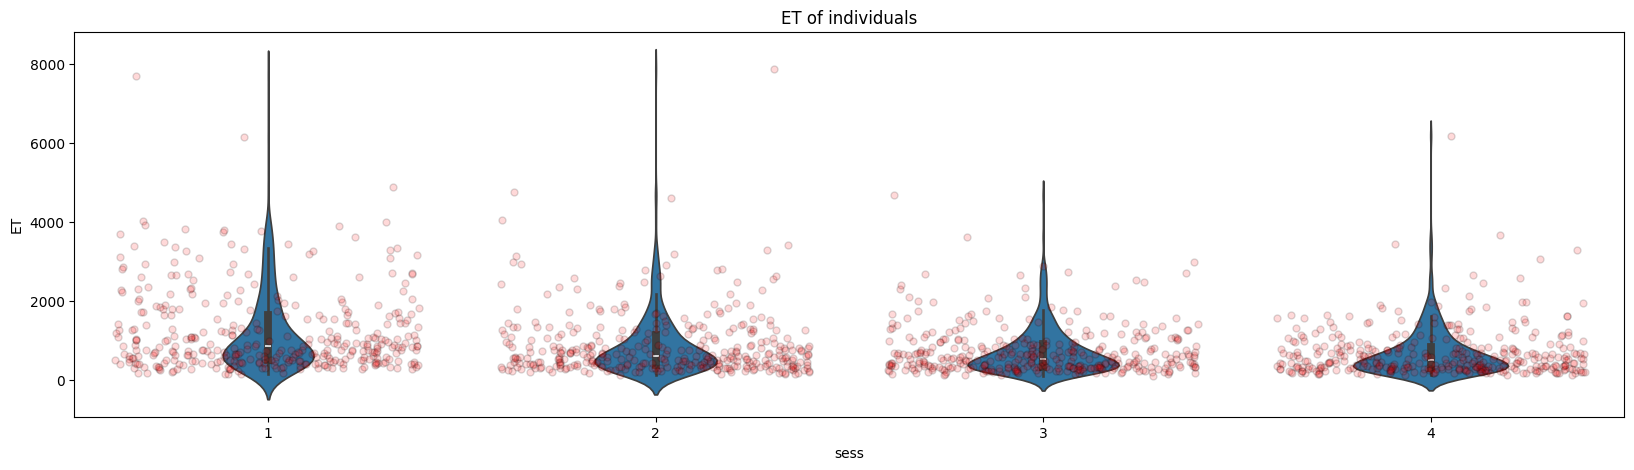

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.violinplot(data=D, x='sess', y='ET', ax=ax, width=0.4)
sns.stripplot(data=D, x='sess', y='ET', jitter=0.4, color='r', alpha=0.15, edgecolor='#000000', linewidth=1)
plt.title('ET of individuals')

for i in range(4):
    rows = (D['sess']==i+1)
    ET_perc = (D[rows]['ET']<2500).sum()/len(D[rows]['ET'])
    print(f'percent ET < 2500 = {ET_perc*100:.2f}%, mean ET = {D[rows]["ET"].mean():.2f}ms')

So the fMRI trials are gonna be 3s. Let's give a margin of 500ms. So we want subject execution times to be under 3-0.5=2.5 seconds. The above analysis shows that even with the relatively low training they received, 98.08% of individual trials had an ET faster than 2.5s. So seems like once you successfully get these 26 chords, you are already very quick.

## CONCLUSION:
**3 days of training is enough for this chord group**

**Experimental Design:**

**Day 1 (training)**: 10 blocks of 50 trials + 1 block of 20 trials = 520 trials. exec_max_time = 5s but trial is complete if held for 1000ms, feedback_time+iti is jittered. Chords repeat for 5 consecutive trials. Estimated Max T = 72-mins

**Day 2 (training)**: 10 blocks of 50 trials + 1 block of 20 trials = 520 trials. exec_max_time = 3s but trial is complete if held for 1000ms, feedback_time+iti is jittered. Chords repeat in batches of 2 trials. Estimated Max T ~ 60-mins

**Day 3 (EMG)**: 10 blocks of 50 trials + 1 block of 20 trials = 520 trials. exec_max_time = 3s fix, feedback_time+iti=1s jittered. Chords repeat in batches of 2 trials. Estimated Time: 25-mins electrode placement + 60-mins chord production + 30-mins natural = 120mins

**Day 4 (EMG)**: 10 blocks of 50 trials + 1 block of 20 trials = 520 trials. exec_max_time = 3s fix, feedback_time+iti=1s jittered. Chords repeat in batches of 2 trials. Estimated Time: 25-mins electrode placement + 60-mins chord production + 30-mins natural = 120mins

**fMRI sess 1**: 8 blocks of 104 trials. exec_max_time = 3s fix, total trial time = 5s fix. 3 rest periods of 15s. End period of 10.5s.

**fMRI sess 2**: 8 blocks of 104 trials. exec_max_time = 3s fix, total trial time = 5s fix. 3 rest periods of 15s. End period of 10.5s.

